In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Data Preperation Module 4
# 2 Files in this module
# Module 4

module4ml = pd.read_csv('Module4-MoodleLogs.csv')

In [7]:
module4mg = pd.read_csv('Module4-MoodleGrades.csv')

In [8]:
print (module4mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Assignment: Upload 1 (Real)', 'Assignment: Upload 2 (Real)', 'Assignment: Upload 3 (Real)', 'Assignment: Upload 4 (Real)', 'Assignment: Upload 5 (Real)', 'Assignment: Upload 6 (Real)', 'Assignment: Upload 7 (Real)', 'Assignment: Overall grade feedback sheets (Real)', 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [9]:
# Print the number of unique values in each modul4mg column
print(module4mg.nunique())

First name                                           64
Surname                                              64
ID number                                            64
Email address                                        64
Assignment: Upload 1 (Real)                           1
Assignment: Upload 2 (Real)                           1
Assignment: Upload 3 (Real)                           1
Assignment: Upload 4 (Real)                           1
Assignment: Upload 5 (Real)                           1
Assignment: Upload 6 (Real)                           1
Assignment: Upload 7 (Real)                           1
Assignment: Overall grade feedback sheets (Real)      1
Assignment: SUBMIT HERE: Title and Purpose (Real)    23
Course total (Real)                                  23
Last downloaded from this course                      1
dtype: int64


In [10]:
# Print the number of unique values in each modul4mg column
print(module4ml.nunique())

Time              1416
User full name      64
Affected user        1
Event context       20
Component            8
Event name          21
Description         80
Origin               2
IP address           1
dtype: int64


In [11]:
#time4
time4 = module4ml["Time"].str.split(",", n = 1, expand = True)

In [12]:
# making separate Date column from new data frame 
module4ml["Date"]= time4[0] 

# making seperate Time column from new data frame
module4ml['Time']= time4[1]


In [13]:
# Convert the date column to datetime64
module4ml.Date = pd.to_datetime(module4ml.Date)


In [14]:
len(module4ml)

2521

In [15]:
#Remove activity outside semester start and end dates range -Timeedit4
mask4 = (module4ml['Date'] >= StartDate) & (module4ml['Date'] <= EndDate)

module4ml = module4ml.loc[mask4]

len(module4ml)

1277

In [16]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_4 = (module4ml['Date'] >= StartDate) & (module4ml['Date'] <= TriOne)

FirstFive4 = module4ml.loc[week5_4]

len(FirstFive4)


606

In [17]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_4 = (module4ml['Date'] >= TriOne) & (module4ml['Date'] <= TriTwo)

FirstTen4 = module4ml.loc[week10_4]

len(FirstTen4)


353

In [18]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_4 = (module4ml['Date'] >= TriTwo) & (module4ml['Date'] <= EndDate)

FirstFivt4 = module4ml.loc[week15_4]

len(FirstFivt4)


375

In [19]:
#
module4ml = module4ml.drop(module4ml[['IP address','Origin','Description','Affected user']], axis=1)

In [20]:
module4ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
dtype: object

In [21]:
module4ml.head(2)

,Time,User full name,Event context,Component,Event name,Date
24,14:26,aOmN bXsd,Course: Module 4,System,Course user report viewed,2019-01-03
68,11:08,aL20 blLY,Course: Module 4,System,Course viewed,2019-01-02


In [22]:
module4ml.columns

Index(['Time', 'User full name', 'Event context', 'Component', 'Event name',
       'Date'],
      dtype='object')

In [23]:
# new data frame with split value columns 
new4 = module4ml["User full name"].str.split(" ", n = 1, expand = True)


In [24]:
# making separate first name column from new data frame 
module4ml["First name"]= new4[0] 

# making separate last name column from new data frame 
module4ml["Last name"]= new4[1] 


In [25]:
module4ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
24,14:26,aOmN bXsd,Course: Module 4,System,Course user report viewed,2019-01-03,aOmN,bXsd
68,11:08,aL20 blLY,Course: Module 4,System,Course viewed,2019-01-02,aL20,blLY


In [26]:
m4ml_subset = module4ml

In [32]:
m4mg = module4mg[['First name', 'Surname', 'ID number', 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)']]

In [27]:
module4ml_onehot = module4ml.copy()
module4ml_onehot = pd.get_dummies(module4ml_onehot, columns=['Event name'], prefix = ['Event name'])
module4ml_onehot = pd.get_dummies(module4ml_onehot, columns=['Event context'], prefix = ['Event context'])
module4ml_onehot = pd.get_dummies(module4ml_onehot, columns=['Component'], prefix = ['Component'])


print(module4ml_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data


      Time User full name       Date First name Last name  \
24   14:26      aOmN bXsd 2019-01-03       aOmN      bXsd   
68   11:08      aL20 blLY 2019-01-02       aL20      blLY   
69   11:07      aL20 blLY 2019-01-02       aL20      blLY   
70   11:07      aei9 bg2L 2019-01-02       aei9      bg2L   
71   11:07      aei9 bg2L 2019-01-02       aei9      bg2L   

    Event name_A file has been uploaded.  \
24                                     0   
68                                     0   
69                                     0   
70                                     0   
71                                     0   

    Event name_A submission has been submitted.  \
24                                            0   
68                                            0   
69                                            0   
70                                            0   
71                                            0   

    Event name_An online text has been uploaded.  \
24       

In [29]:
module4ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,...,Event context_File: Updated Module Brief,Event context_Forum: News forum,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Online text submissions,Component_Overview report,Component_System,Component_User report
24,14:26,aOmN bXsd,2019-01-03,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
68,11:08,aL20 blLY,2019-01-02,aL20,blLY,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
m4mg_subset.head(2)

,First name,Surname,ID number,Assignment: SUBMIT HERE: Title and Purpose (Real),Course total (Real)
0,auP2,buYz,PuP2uYzI,0.0,0.0
1,aTka,b80f,wTka80ff,45.0,45.0


In [36]:

#Engaged = > 55
engaged4 = m4mg['Course total (Real)'] > 55


In [37]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m4mg['engaged'] = np.where(m4mg['Course total (Real)']>=55, '1', '0')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
m4mg['engaged'] = pd.to_numeric(m4mg['engaged'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
print(m4mg['engaged'].value_counts(dropna=False))

0    42
1    22
Name: engaged, dtype: int64


In [40]:
m4mg_subset = m4mg

In [41]:
# Merge subset
merge_subset4 = pd.merge(module4ml_onehot,m4mg_subset[['First name','engaged']],on='First name', how='left')

In [42]:
merge_subset4.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,...,Event context_Forum: News forum,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Online text submissions,Component_Overview report,Component_System,Component_User report,engaged
0,14:26,aOmN bXsd,2019-01-03,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,11:08,aL20 blLY,2019-01-02,aL20,blLY,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
X4s = merge_subset4.iloc[:,5:50]  #independent columns
y4s = merge_subset4.iloc[:,-1]    #target column i.e engaged


In [44]:
X4s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,...,Event context_File: Updated Module Brief,Event context_Forum: News forum,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Online text submissions,Component_Overview report,Component_System,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
y4s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [46]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X4s,y4s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X4s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
19  Event context_Assignment: SUBMIT HERE: Title a...  13.908552
29                            Event context_File: MOH   8.067259
41                  Component_Online text submissions   6.445808
26                Event context_File: How to Do a NSD   5.951746
34       Event context_File: Ss - Self Directed Study   5.766122
23                             Event context_File: CB   5.586463
12                     Event name_Submission created.   4.834356
31              Event context_File: Module Brief -MOH   4.248463
43                                   Component_System   4.008053
40                                    Component_Forum   3.359151


[ 0.00081739  0.00961362  0.00154047  0.0086193   0.01060467  0.00249943
  0.00395432  0.0108914   0.00895153  0.00317161  0.02756994  0.00423364
  0.00469252  0.01054264  0.04565581  0.01698159  0.00344511  0.01177193
  0.05088291  0.13842946  0.02611716  0.01545824  0.00921333  0.04476903
  0.00644531  0.03089884  0.0529241   0.03543688  0.00753973  0.10669476
  0.00911976  0.06242223  0.00540871  0.0156644   0.05065698  0.00558706
  0.01245037  0.0146749   0.03084852  0.00637441  0.01307131  0.0219667
  0.00232921  0.02044849  0.01861032]


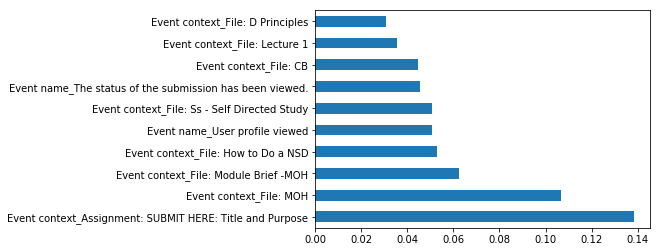

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X4s,y4s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X4s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


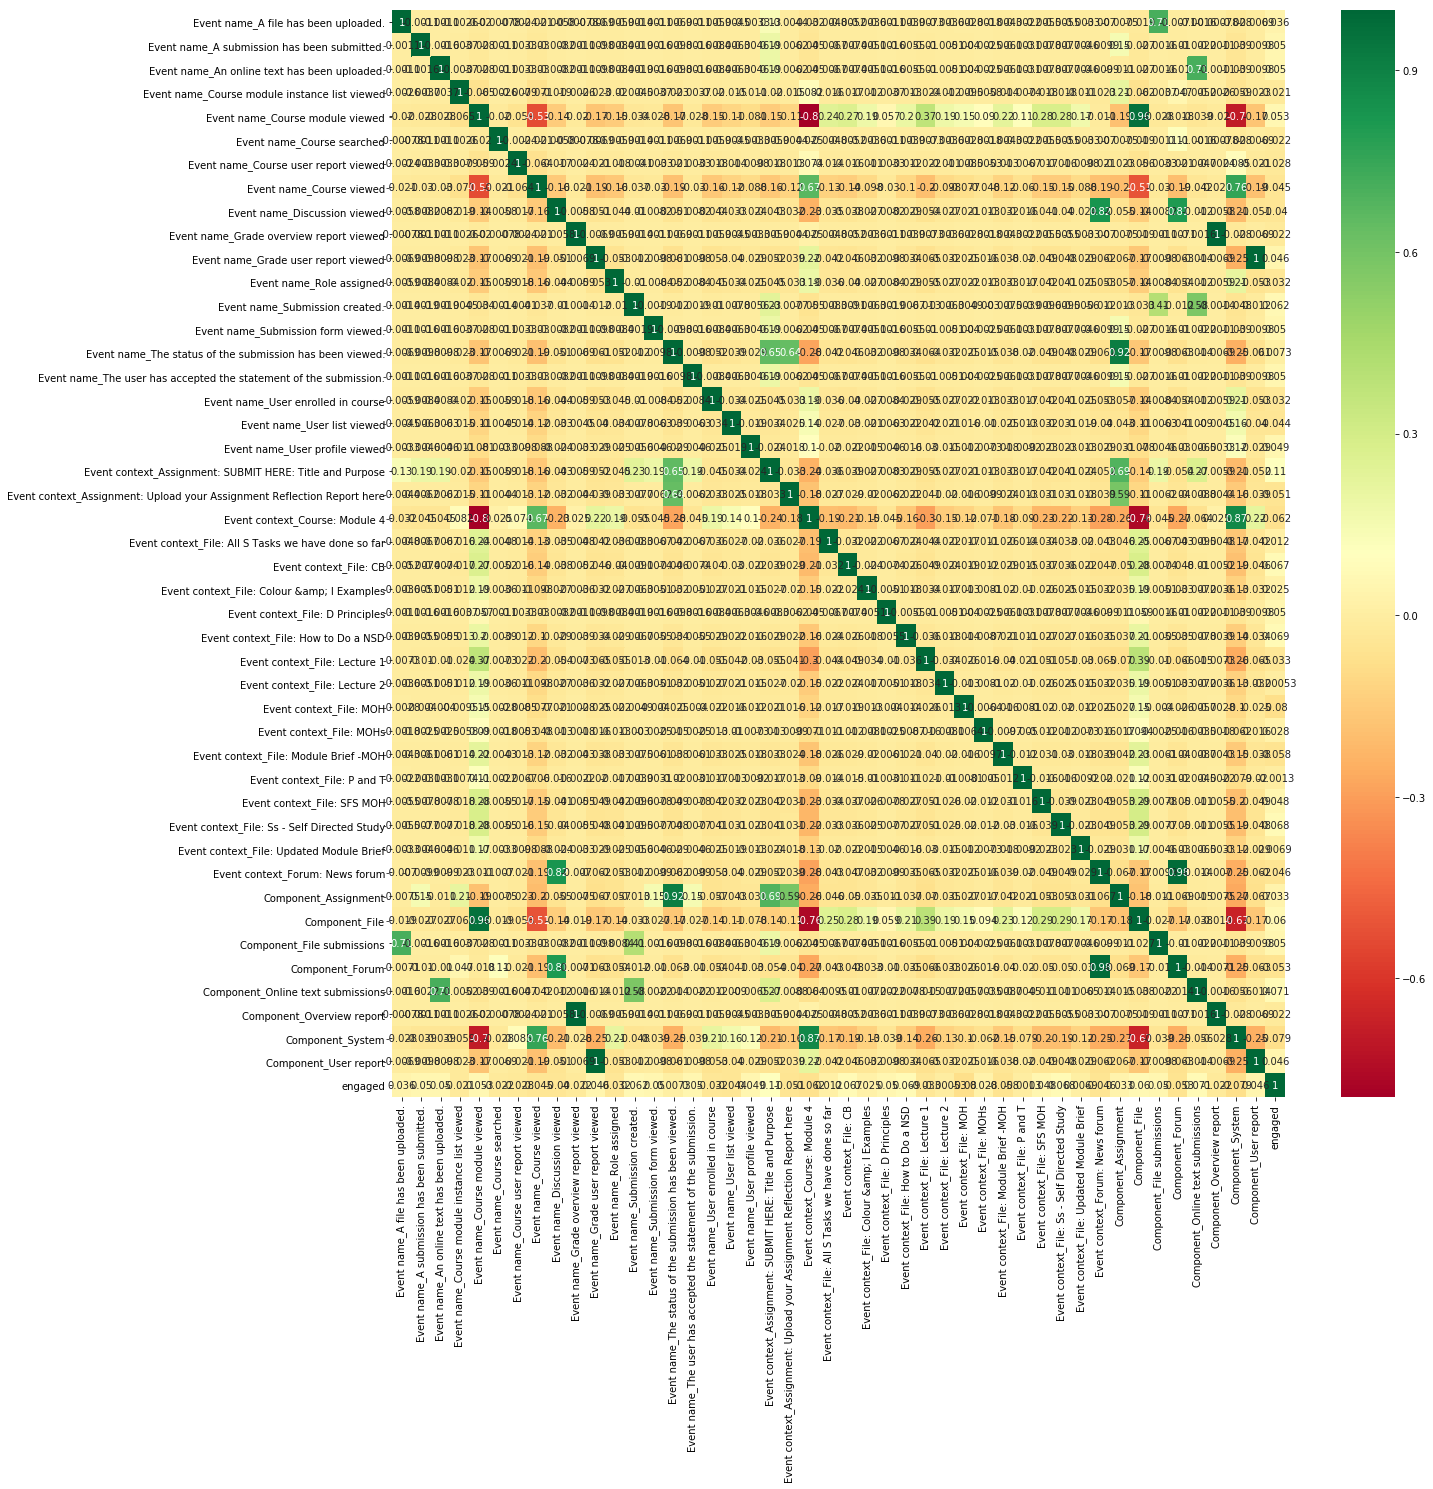

In [48]:

#get correlations of each features in dataset
corrmat = merge_subset4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset4[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [49]:
X4s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_An online text has been uploaded.',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed',
       'Event context_Assignment: SUBMIT HERE: Title and Purpose',
       'Event context_Assignment: Upload your Assignment Reflection Repo

In [51]:
#9  Event context_Assignment: SUBMIT HERE: Title a...  13.908552
#29                            Event context_File: MOH   8.067259
#41                  Component_Online text submissions   6.445808
#26                Event context_File: How to Do a NSD   5.951746
#34       Event context_File: Ss - Self Directed Study   5.766122
#23                             Event context_File: CB   5.586463
#12                     Event name_Submission created.   4.834356
#31              Event context_File: Module Brief -MOH   4.248463
#43                                   Component_System   4.008053
#40                                    Component_Forum   3.359151
#
#

In [50]:
featselect4 = X4s[['Event context_Assignment: SUBMIT HERE: Title and Purpose','Event context_File: MOHs','Component_Online text submissions','Event context_File: How to Do a NSD','Event context_File: Ss - Self Directed Study','Event context_File: CB','Event name_Submission created.','Event context_File: Module Brief -MOH','Component_System','Component_Forum']]

In [52]:
Xfs4 = featselect4 # Features
yfs4 = y4s # Target variable


In [53]:
# Split dataset into training set and test set
Xfs4_train, Xfs4_test, yfs4_train, yfs4_test = train_test_split(Xfs4, yfs4, test_size=0.3, random_state=1) # 70% training and 30% test


In [58]:
# Create Decision Tree classifer object
dtclffs4 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs4 = dtclffs4.fit(Xfs4_train,yfs4_train)

#Predict the response for test dataset
yfs4_pred = dtclffs4.predict(Xfs4_test)



In [66]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10))

0.63602372035


In [59]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg4 = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg4.fit(Xfs4_train, yfs4_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfslrdt4 = [logreg4, dtclffs4]


In [67]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(logreg4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10))

0.63602372035


In [60]:
# Review the decision regions of the two classifiers
#plot_labeled_decision_regions(Xfs4_test, yfs4_test, clflrdt4)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs4_test, yfs4_pred))


Accuracy: 0.635416666667


In [61]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs4_test, yfs4_pred))


0.603773584906


In [62]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs4_test, yfs4_pred))


0.211920529801


In [63]:
print("Accuracy:",metrics.accuracy_score(yfs4_test, yfs4_pred))
print("Precision:",metrics.precision_score(yfs4_test, yfs4_pred))
print("Recall:",metrics.recall_score(yfs4_test, yfs4_pred))
print("F1 Score",metrics.f1_score(yfs4_test, yfs4_pred))


Accuracy: 0.635416666667
Precision: 0.603773584906
Recall: 0.211920529801
F1 Score 0.313725490196


In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs4_test, yfs4_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs4_test, yfs4_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs4_test, yfs4_pred)))

Mean Absolute Error: 0.364583333333
Mean Squared Error: 0.364583333333
Root Mean Squared Error: 0.603807364425


In [65]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
lregfs4 = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(lregfs4, Xfs4, yfs4, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(lregfs4, Xfs4, yfs4, cv = 10)
print(np.mean(cvscores_10))

-0.0209213584532
-0.0649645285249


In [68]:
# Instantiate the classifier
rfclffs4 = RandomForestClassifier()

# Fit to the training data
rfclffs4.fit(Xfs4_train, yfs4_train)

# Compute accuracy
print(rfclffs4.score(Xfs4_test, yfs4_test))


0.627604166667


In [69]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10rf))

0.63602372035


In [70]:
from sklearn.svm import SVC

svcfs4 = SVC()

#Train it, or "fit it", to the data:
svcfs4.fit(Xfs4_train, yfs4_train)

# Compute accuracy
print(svcfs4.score(Xfs4_test, yfs4_test))


0.619791666667


In [71]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs4, Xfs4_train, yfs4_train, cv = 10)
print(np.mean(cvscores_10svc))

0.621504653274


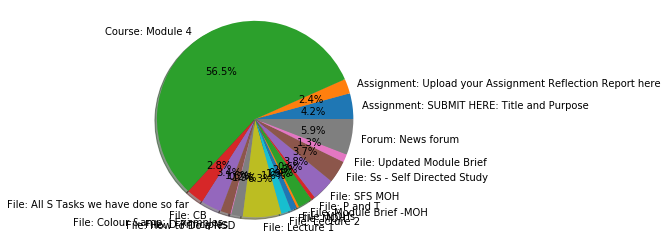

In [72]:
labels = m4ml_subset['Event context'].astype('category').cat.categories.tolist()
counts = m4ml_subset['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

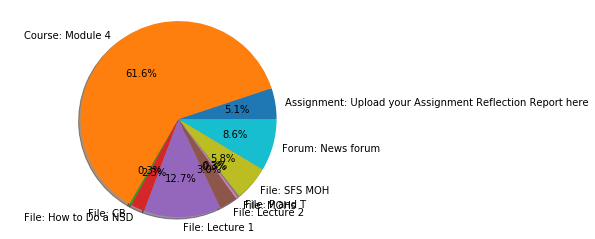

In [73]:
labels = FirstFive4['Event context'].astype('category').cat.categories.tolist()
counts = FirstFive4['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [74]:
m4ml_subset["Event context"].value_counts()


Course: Module 4                                             721
File: Lecture 1                                               81
Forum: News forum                                             75
Assignment: SUBMIT HERE: Title and Purpose                    54
File: SFS MOH                                                 48
File: Ss - Self Directed Study                                47
File: CB                                                      43
File: All S Tasks we have done so far                         36
Assignment: Upload your Assignment Reflection Report here     31
File: Module Brief -MOH                                       30
File: How to Do a NSD                                         24
File: Lecture 2                                               21
File: Colour &amp; I Examples                                 21
File: Updated Module Brief                                    17
File: MOH                                                     13
File: P and T            

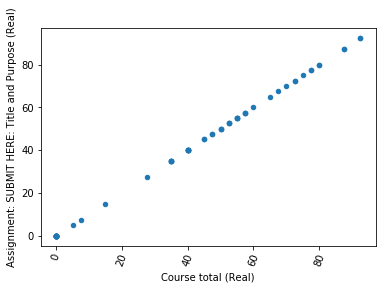

In [75]:
m4mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: SUBMIT HERE: Title and Purpose (Real)', rot=70)

In [76]:
m4mg.describe().transpose()
# Generates descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Assignment: SUBMIT HERE: Title and Purpose (Real),64.0,39.882812,29.166428,0.0,3.75,42.5,57.5,92.5
Course total (Real),64.0,39.882812,29.166428,0.0,3.75,42.5,57.5,92.5
engaged,64.0,0.343750,0.478714,0.0,0.00,0.0,1.0,1.0


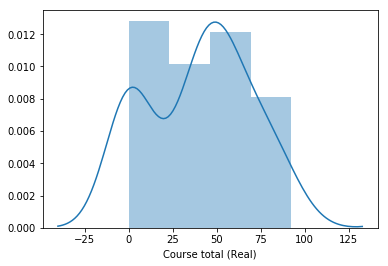

In [77]:
sns.distplot(m4mg['Course total (Real)'])

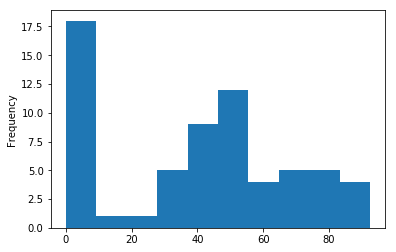

In [78]:
m4mg_subset['Course total (Real)'].plot('hist')